In [562]:
import time_series
import brownian
from importlib import reload
reload(time_series)
reload(brownian)
from time_series import Collection, find_ders, find_files
from brownian import logbin_func, abc_guess, psd_abc_func
import matplotlib.pyplot as plt
import numpy as np

In [563]:
base_der = "/mnt/ext/data"

In [564]:
date_ders = find_ders(base_der) # Experimental data is organized by date-collected
date_ders

['/mnt/ext/data/20201103',
 '/mnt/ext/data/20201111',
 '/mnt/ext/data/20201130',
 '/mnt/ext/data/20201204',
 '/mnt/ext/data/20201214',
 '/mnt/ext/data/20210113',
 '/mnt/ext/data/20210114',
 '/mnt/ext/data/20210120',
 '/mnt/ext/data/20210121',
 '/mnt/ext/data/20210202',
 '/mnt/ext/data/20210203',
 '/mnt/ext/data/20210208',
 '/mnt/ext/data/20210210',
 '/mnt/ext/data/20210408',
 '/mnt/ext/data/20210409',
 '/mnt/ext/data/20210412',
 '/mnt/ext/data/20210419',
 '/mnt/ext/data/20210517',
 '/mnt/ext/data/20210519',
 '/mnt/ext/data/20210601',
 '/mnt/ext/data/20210602',
 '/mnt/ext/data/20210604',
 '/mnt/ext/data/20210608',
 '/mnt/ext/data/20210624',
 '/mnt/ext/data/20210719',
 '/mnt/ext/data/20211004',
 '/mnt/ext/data/20211008',
 '/mnt/ext/data/20211012',
 '/mnt/ext/data/20211013',
 '/mnt/ext/data/pinhole_scan',
 '/mnt/ext/data/wire_calibration']

In [565]:
date_der =  '/mnt/ext/data/20211012' 
run_ders = find_ders(date_der)
print(f"Available runs: {run_ders}")

Available runs: ['/mnt/ext/data/20211012/2beadsQ', '/mnt/ext/data/20211012/baseline', '/mnt/ext/data/20211012/bead1', '/mnt/ext/data/20211012/bead2']


In [566]:
run_der = '/mnt/ext/data/20211012/bead1'
run_ders = find_ders(run_der)
print(f"Available runs: {run_ders}")


Available runs: ['/mnt/ext/data/20211012/bead1/CW1', '/mnt/ext/data/20211012/bead1/CW2', '/mnt/ext/data/20211012/bead1/pulse1', '/mnt/ext/data/20211012/bead1/pulse1_weak-trap', '/mnt/ext/data/20211012/bead1/pulse2', '/mnt/ext/data/20211012/bead1/pulse2_weak-trap', '/mnt/ext/data/20211012/bead1/pulse3', '/mnt/ext/data/20211012/bead1/pulse4']


In [588]:
baseline_trial_fnames = find_files('/mnt/ext/data/20211012/baseline')
trial_fnames = find_files('/mnt/ext/data/20211012/bead1/CW2')

40


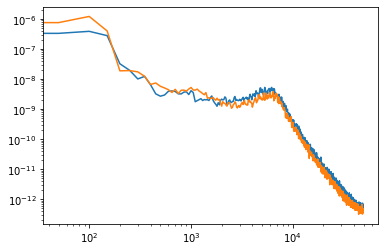

In [590]:
B = Collection(baseline_trial_fnames[0])
C = Collection(trial_fnames[0])
for D in [B, C]:
    D.set_channel("X", bin_average=256)
    D.average("PSD", taumax=20e-3)
    plt.loglog(D.freq, D.psd)


    #D.set_channel("VY", bin_average=128)
    3#D.average("PSD", taumax=5e-3)
    #plt.loglog(D.freq, D.psd)
print(D.Navg_psd)

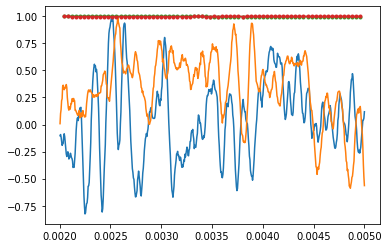

In [591]:
tmin = 0.002
tmax = 0.005

C = Collection(trial_fnames[1])
C.set_channel("X", bin_average=128)
C.apply("detrend", inplace=True)
C.average("DATA")
mask = np.logical_and(C.tdata>tmin, C.tdata<tmax)
plt.plot(C.tdata[mask], C.data[mask]/np.max(C.data[mask]))

C.set_channel("Y", bin_average=128)
C.apply("detrend", inplace=True)
C.average("DATA")
mask = np.logical_and(C.tdata>tmin, C.tdata<tmax)
plt.plot(C.tdata[mask], C.data[mask]/np.max(C.data[mask]))


C.set_channel("I")
C.average("DATA")
mask = np.logical_and(C.tdata>tmin, C.tdata<tmax)
plt.plot(C.tdata[mask], C.data[mask]/np.max(C.data[mask]), marker=".")

C.set_channel("T")
C.average("DATA")
mask = np.logical_and(C.tdata>tmin, C.tdata<tmax)
plt.plot(C.tdata[mask], C.data[mask]/np.max(C.data[mask]), marker=".")



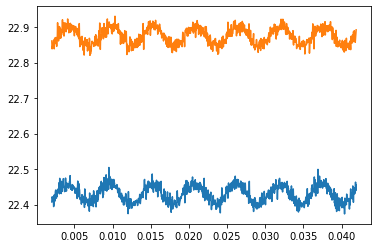

In [593]:
tmin = 0.002
tmax = 0.1
B = Collection(baseline_trial_fnames[0])
C = Collection(trial_fnames[0])
for D in [B, C]:
    for ch in ["T"]:
        if ch[-1] in ["X", "Y"]:
            Npts = 128
            detrend=True
        else:
            Npts = 1
            detrend=False
        
        D.set_channel(ch, bin_average=Npts)
        if detrend:
            D.apply("detrend", inplace=True)
        D.average("DATA")
        mask = np.logical_and(D.tdata>tmin, D.tdata<tmax)
        plt.plot(D.tdata[mask], D.data[mask])
        



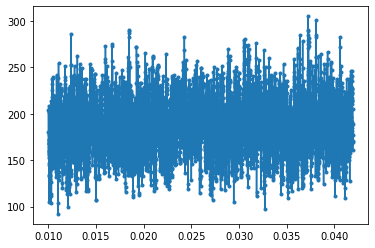

In [570]:
C = Collection(baseline_trial_fnames[1])
tmin = 0.01
tmax = 0.1
C.set_channel("VX", bin_average=128)
C.average("DATA", pow=2)
mask = np.logical_and(C.tdata>tmin, C.tdata<tmax)
plt.plot(C.tdata[mask], np.sqrt(C.data[mask]), marker=".")


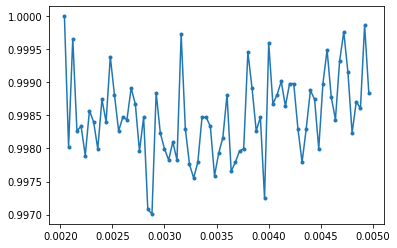

In [546]:
C.set_channel("T")
C.average("DATA")
mask = np.logical_and(C.tdata>tmin, C.tdata<tmax)
plt.plot(C.tdata[mask], C.data[mask]/np.max(C.data[mask]), marker=".")

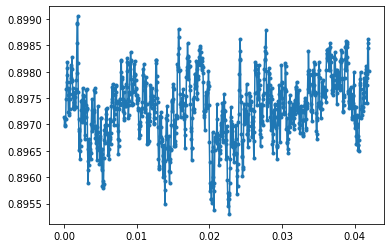

In [496]:

C.set_channel("Bout")
C.average("DATA")
mask = np.logical_and(C.tdata>tmin, C.tdata<tmax)
plt.plot(C.tdata[mask], C.data[mask], marker=".")

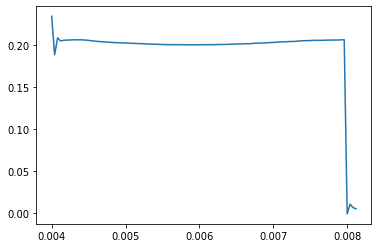

In [435]:
C.set_channel("I")
C.average("DATA")
mask = np.logical_and(C.tdata>tmin, C.tdata<tmax)
plt.plot(C.tdata[mask], C.data[mask])


NameError: name 'bead2' is not defined

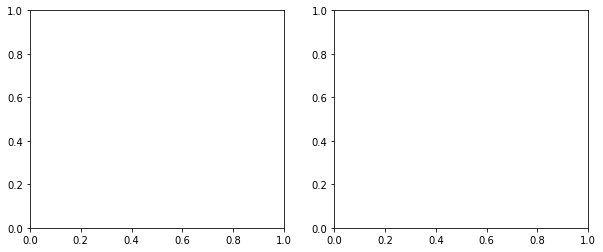

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fmin = 2e3
fmax = 3e4

for deri, der in enumerate(bead2[:1]):
    color = f"C{deri}"
    files = find_files(der)
    for file in files[:3]:
        X = Collection(file, coord="x")
        Y = Collection(file, coord="y")
        for Ci, C in enumerate([X, Y]):
            N = CN[Ci]
            C.apply("restore")
            C.apply("bin_average", Npts=64, inplace=True)
            C.average("PSD", noverlap=None, window="hann", taumax=20e-3, n_jobs=10)
            N.apply("restore")
            N.apply("bin_average", Npts=64, inplace=True)
            N.average("PSD", noverlap=None, window="hann", taumax=20e-3, n_jobs=10)
            if Ci == 0:
                print("V:", np.mean(C.Vs))
                print(f"Navg: {C.Navg_psd}")
            freq = C.freq
            psd = C.psd - N.psd
            mask = np.logical_and(freq<fmax, freq>fmin)
            abc0, pcov0 = abc_guess(freq[mask], psd[mask], n=C.Navg_psd)
            fplot = logbin_func(freq, func=np.mean, Npts=20)
            Pplot = logbin_func(psd, func=np.mean, Npts=20)
            axs[Ci].loglog(fplot, Pplot, marker="o", mfc="none", ls="none", mec=color)
            axs[Ci].loglog(fplot, psd_abc_func(fplot, *abc0), color=color)
            #axs[Ci].loglog(N.freq, N.psd, marker="o", ls="none")
            axs[Ci].axvline(fmin)
            axs[Ci].axvline(fmax)

V: -0.0019753579115697143
T: 25.236063364747835
Navg: 20
V: -0.0019952905089757737
T: 25.17825060820534
Navg: 20
V: 0.15620769614207403
T: 25.186179130737617
Navg: 20
V: 1.1043652529168457
T: 25.328104785302425
Navg: 20
V: 0.2110579235112245
T: 25.296451512995155
Navg: 20
V: -0.0019699877214919424
T: 25.321157106189666
Navg: 20
V: 0.8139995104526202
T: 25.355782422830526
Navg: 20
V: -0.0019840179478247005
T: 25.374331717488396
Navg: 20
V: 0.18065036836182696
T: 25.574049860432424
Navg: 20
V: 1.0458178367364002
T: 25.41539046805159
Navg: 20
V: 0.3210368485416513
T: 25.606437613204825
Navg: 20
V: 0.6191927175726362
T: 25.63125032092871
Navg: 60


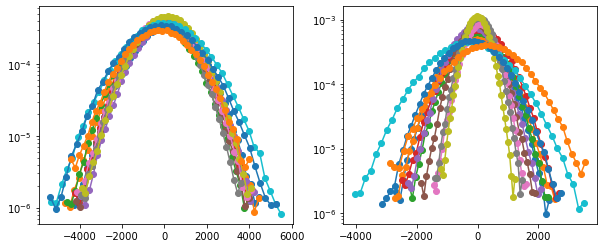

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for der in bead2[:]:
    files = find_files(der)
    for file in files[:1]:
        X = Collection(file, coord="vx", bin_average=256)
        Y = Collection(file, coord="vy", bin_average=256)
        for Ci, C in enumerate([X, Y]):
            C.average("HIST", n_jobs = 10)
            if Ci == 0:
                print("V:", np.mean(C.Vs))
                print("T:", np.mean(C.Ts))
                print(f"Navg: {C.Navg_hist}")
            axs[Ci].semilogy(C.bins, C.hist, marker="o")